## 10. 통계적 추정
### - 점추정
### - 구간추정

* 점추정 -> 추정하고 싶은 모평균이나 모분산이라는 모수를 하나의 수치로 추정하는 방법
* 구간추정 -> 폭(구간)으로 모수를 추정하는 방법

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

%precision 3
%matplotlib inline

In [3]:
# 테스트 데이터 준비
df = pd.read_csv("ch4_scores400.csv")
scores = np.array(df['score'])

In [4]:
# 모평균과 모분산 구해놓기
p_mean = np.mean(scores)
p_var = np.var(scores)

p_mean, p_var

(69.53, 206.6691)

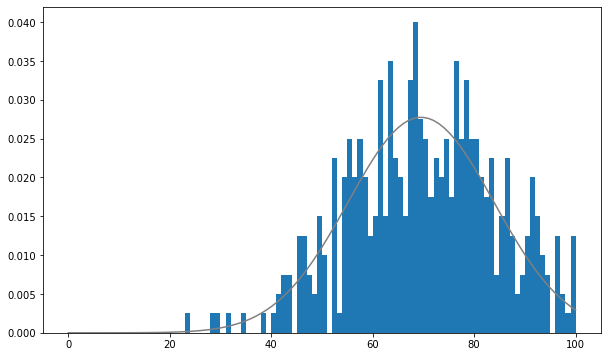

In [5]:
# 전교생의 히스토그램과 정규분포 중첩 -> 정규분포라는 가정이 어느 정도 타당한지 알기 위해
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

xs = np.arange(101)
rv = stats.norm(p_mean, np.sqrt(p_var))
ax.plot(xs, rv.pdf(xs), color='gray')
ax.hist(scores, bins=100, range=(0,100), density=True)

plt.show() # 정규분포에 가까운 특징을 지닌 분포인듯

In [6]:
# 무작위추출한 20명의 표본 데이터 준비
np.random.seed(0)
n = 20
sample = np.random.choice(scores, n)
sample

array([49, 60, 72, 86, 52, 61, 77, 91, 80, 56, 69, 67, 90, 56, 75, 79, 60,
       79, 68, 81], dtype=int64)

In [7]:
# 표본 크기가 20인 표본 데이터를 1만 개 준비
# 이 데이터를 사용하여 평균과 분산을 어느 정도의 정확도로 추측할 수 있는지 시뮬레이션
np.random.seed(1111)
n_samples = 10000
samples = np.random.choice(scores, (n_samples, n))

#### 1. 점추정
* 점추정에서는 모평균이나 모분산 등의 모수를 하나의 수치로 추정
* 모평균의 점추정
  - 무작위추출로 얻은 20명의 시험 점수는 기댓값이 $\mu$, 분산이 $\sigma^2$인 확률분포를 따르고 서로 독립인 확률변수 $X_1,\dots,X_{20}$이라 할 수 있음
  - 이것들로부터 계산되는 표본평균 $\bar{X} = X_1+ \dots + X_{20} \over n$도 확률변수가 되고, 시행할 때마다 얻게 되는 결과가 다름
  - 이 표본평균의 기댓값은 $\mu$가 되고, 모평균과 일치
    + 추정량의 기댓값이 추측하려는 모수가 되는 성질 = 불편성 (unbiasedness)
    + 불편성을 가진 추정량 = 불편추정량 (unbiased estimator)
  - 불편성 외에도 추정량이 가지고 있으면 좋은 성질 있음
    + 표본 크기 $n$을 증가시키면 추측하기 원하는 모수에 수렴해가는 성질 = 일치성 (consistency)
    + 일치성을 지닌 추정량 = 일치추정량 (consistent estimator)
  - 이 밖에도 유효성(efficiency)이 있음
    + 불편성을 보다 강력하게 한 것으로 불편추정량 중에서도 분산이 최소가 되는 추정량이 지닌 성질
    + 즉 유효성을 지닌 추정량이 더 '좋은 추정량'이라 할 수 있음
    + 그러나 확인하기 어려운 성질...
* 모분산의 점추정
  - 불편분산(unbiased variance) = 모분산의 불편추정량이 되는 표본통계량 (표본분산은 $S^2$, 불편분산은 $s^2$)
  - $s^2 = {1 \over {n-1}} \sum_{i=1}^{n}{(X_i - \bar{X})^2}$
  - 여기서 나누는 수 $n-1$은 자유도(degree of freedom)이라 함
    + 자유도는 자유롭게 값을 취할 수 있은 변수의 개수
    + 표본평균이라면 식 안의 $\sum_{i=1}^{n}X_i$에는 아무 제약이 없고 각 $X_i$가 자유롭게 값을 취할 수 있음 -> 자유도 = $n$
    + 분산의 경우 식 안의 $\sum_{i=1}^{n}{(X_i - \bar{X})^2}$에서 각 $X_i$가 ${1 \over {n}} \sum_{i=1}^{n}{X_i} = {\bar{X}}$를 만족해야 하는 제약이 생김 -> 그러므로 자유도가 하나 감소되어 $n-1$이 됨
  - 모평균과 모분산의 점추정 내용 정리:\
  $X_1,X_2,\dots,X_n$이 서로 독립이고 기댓값 $\mu$, 분산이 $\sigma^2$인 확률분포를 따를 때,\
  표본평균 $\bar{X}$와 불편분산 $s^2$은 각각 모평균 $\mu$와 모분산 $\sigma^2$에 대해서 불편성과 일치성을 지닌 추정량이 된다.

In [8]:
# 표본평균 -> 시행할 때마다 다른 결과를 얻을 수 있음
for i in range(5):
    s_mean = np.mean(samples[i])
    print(f'{i+1}번째 표본평균: {s_mean:.3f}')

1번째 표본평균: 67.000
2번째 표본평균: 72.850
3번째 표본평균: 69.200
4번째 표본평균: 64.450
5번째 표본평균: 72.650


In [9]:
# 대수의 법칙을 활용하여 표본평균의 기댓값 확인
sample_means = np.mean(samples, axis=1)
np.mean(sample_means)

69.53799999999998

In [10]:
# n이 100만일 때 표본평균의 일치추정량
np.mean(np.random.choice(scores, int(1e6))) # 표본 크기가 증가하면 표본평균은 모평균에 수렴

69.542954

In [11]:
# 추출한 표본으로 표본평균 계산
s_mean = np.mean(sample)
s_mean

70.4

In [12]:
# 표본평균과 마찬가지로 표본분산도 확률변수가 되고 시행할 때마다 결과가 달라짐
for i in range(5):
    s_var = np.var(samples[i])
    print(f'{i+1}번째 표본분산: {s_var:.3f}')

1번째 표본분산: 116.800
2번째 표본분산: 162.928
3번째 표본분산: 187.060
4번째 표본분산: 149.148
5번째 표본분산: 111.528


In [13]:
# 대수의 법칙을 활용하여 표본분산이 모분산의 불편추정량이 되는지 확인
sample_vars = np.var(samples, axis=1)
np.mean(sample_vars) # 표본분산은 모분산의 불편추정량이 아닌가봄

196.34417850000003

In [14]:
# numpy에서 불편분산 구하기 (ddof; delta degrees of freedom: 자유도의 차이 -> 그러므로 자유도 n-1로 계산하기 위해서 ddof=1 지정)
# 표본분산과 마찬가지로 대수의 법칙을 활용하여 구하기
sample_u_vars = np.var(samples, axis=1, ddof=1)
np.mean(sample_u_vars) # 모분산에 가까워졌고, 모분산의 불편추정량이 된 듯

206.67808263157895

In [17]:
# 불편분산은 모분산의 일치추정량 구하기
np.var(np.random.choice(scores, int(1e6)), ddof=1) # 불편분산이 모분산에 대해 불편성과 일치성을 지닌 좋은 추정량임을 확인

207.08336592317

In [18]:
# 추출한 표본으로 불편분산 계산
u_var = np.var(sample, ddof=1)
u_var

158.25263157894742

#### 2. 구간추정
* 표본평균이나 불편분산은 확률변수이므로 아무리 좋은 추정량이라고 입증되어도 우연히 편향된 표본을 추출해버리는 경우 예상과 다른 추정이 될 가능성도 있음
* 그러므로 사전에 예상되는 오차를 예측하고 모평균이 이 범위에 있다는 주장을 할 수 있으면 보다 좋은 추정이 될 것임 => 구간추정의 필요성
* 정규분포의 모평균 구간추정: 모분산을 알고 있는 경우
  - 모집단으로 정규분포를 가정했으므로 표본평균 $\bar{X}$는 $N({\mu},{\sigma^2 \over n})$을 따름
    + 결국 표본평균이라는 추정량은 기댓값 그 자체인 모평균 $\mu$와 표준편차 $\sqrt{\sigma^2 \over n}$으로 분산되어 있음
    + 이 때 추정량의 표준편차 = 표준오차 (standard error)
    + 여기서는 모분산을 안다고 가정했으므로 표준오차를 계산하고 추정량의 오차를 예측할 수 있음
    + 표준정규분포를 활용하여 구간을 계산
      * ex) 95% 구간 -> $(\bar{X} - \mu) / \sqrt{\sigma^2 \over n}$에 관한 다음의 부등식이 성립\
      $P(z_{0.975} \leq (\bar{X} - \mu) / \sqrt{\sigma^2 \over n} \leq z_{0.025}) = 0.95$
    + 위의 식은 확률변수 $(\bar{X} - \mu) / \sqrt{\sigma^2 \over n}$이 구간 $[z_{0.975}, z_{0.025}]$에 위치할 확률이 95%임을 나타냄
    + P안이 내용을 이렇게 바꿀 수도 있음\
    $P(\bar{X} - z_{0.025} \sqrt{\sigma^2 \over n} \leq {\mu} \leq \bar{X} - z_{0.975} \sqrt{\sigma^2 \over n}) = 0.95$
    + 이 식은 $[\bar{X} - z_{0.025} \sqrt{\sigma^2 \over n}, \bar{X} - z_{0.975} \sqrt{\sigma^2 \over n}]$가 모평균 $\mu$를 포함할 확률이 95%라고 해석됨
    + 이 구간 자체가 구간추정으로 구한 것이므로, 신뢰수준 95%인 신뢰구간 (confidence interval, CI) 또는 95% 신뢰구간이라 함
    + 신뢰구간의 상한과 하한을 각각 신뢰상한(upper confidence limit), 신뢰하한(lower confidence limit)이라고 함
    + 이를 일반화하여... 모분산을 알고 있을 때 모평균의 신뢰구간:\
    $X_1,X_2,\dots,X_n \sim^{iid} N(\mu, \sigma^2)$일 때 모분산 $\sigma^2$을 알고 있다면, 신뢰수준 $100(1-\alpha)$%인 신뢰구간은\
    $[\bar{X} - z_{\alpha/2} \sqrt{\sigma^2 \over n}, \bar{X} - z_{1 - \alpha/2} \sqrt{\sigma^2 \over n}]$이 됨
    + 95% 신뢰구간이 [64.1, 76.7]일 때 일반적으로는 모평균이 95%의 확률로 구간 [64.1, 76.7]에 들어간다고 해석하고 싶겠지만 그렇게 해선 안됨
    + 올바른 해석은 '동일한 방법으로 수차례 표본추출하여 구간추정을 하면 그중에 95%의 구간추정에는 모평균이 포함되어 있다.'임
    + 확률적으로 변동하는 것은 구간이지 모평균이 아니라는 점을 기억!
* 정규분포의 모분산 구간추정 (모집단으로 정규분포, 모평균은 모르는 경우 가정)
  - 모분산의 구간추정을 할 때 $P(* \leq \sigma^2 \leq *) = 0.95$의 형태를 목표로 함
  - 이를 위해선 표본평균 $\bar{X}$를 표준화하여 표준정규분포를 따르는 확률변수로 변환한 것처럼 불편분산 $s^2$도 어떤 변환을 하여 대표적인 확률분포를 따르는 확률변수를 생성할 필요가 있음
  - 이 때 카이제곱분포를 활용 -> 불편분산 $s^2$에 $Y = {{(n-1)s^2} \over {\sigma^2}}$이라는 변환을 통해 $Y \sim {\chi^2}(n-1)$이 됨
  - 모분산의 95% 신뢰구간
    + 우선 ${\chi^2}(n-1)$의 95% 구간을 구한다 -> $P(\chi_{0.975}^2(n-1) \leq {{(n-1)s^2} \over {\sigma^2}} \leq \chi_{0.025}^2(n-1)) = 0.95$
    + $\sigma^2$에 관한 부등식이 되도록 변형 -> $P({{(n-1)s^2} \over {\chi_{0.025}^2(n-1)}} \leq {\sigma^2} \leq {{(n-1)s^2} \over {\chi_{0.975}^2(n-1)}}) = 0.95$
    + 이것으로 모분산의 신뢰수준 95%의 신뢰구간을 구한다 -> $[{{(n-1)s^2} \over {\chi_{0.025}^2(n-1)}} \leq {\sigma^2} \leq {{(n-1)s^2} \over {\chi_{0.975}^2(n-1)}}]$
    + 이를 일반화하여... 모분산의 신뢰구간:\
    $X_1,X_2,\dots,X_n \sim^{iid} N(\mu,\sigma^2)$이라고 할 때 모평균 $\mu$를 모를 때 신뢰수준 $100(1-\alpha)$%의 신뢰구간은\
    $[{{(n-1)s^2} \over {\chi_{0.025}^2(n-1)}},{{(n-1)s^2} \over {\chi_{0.975}^2(n-1)}}]$으로 추정
* 정규분포의 모평균 구간추정: 모분산을 모르는 경우
  - 실제로는 모분산을 모르는 경우가 더 많음
  - 사용하는 확률분포는 달라도 모분산을 알고 있는 경우와 거의 동일하게 구간추정을 할 수 있음
  - 모분산 $\sigma^2$ 대신 그 추정량인 불편분산 $s^2$을 사용한 $\sqrt{s^2 \over n}$을 표준오차로 대신 사용
  - $\sqrt{\sigma^2 \over n}$을 사용하여 표본평균 $\bar{X}$에 대해서 변환할 수 있음\
  $t = {{\bar{X} - \mu} \over {\sqrt{s^2 \over n}}}$
  - 표준화와 동일한 변환이지만 실제의 표준오차를 사용하지 않기 때문에 t는 표준정규분포를 따르지 않음
  - 표준정규분포와 비교했을 때 $\sqrt{s^2 \over {\sigma^2}}$만 차이가 생김
  - 이는 카이제곱분포의 관계식 $Y = {(n-1)s^2 \over {\sigma^2}}$을 활용하여 ${s^2 \over {\sigma^2}} = {Y \over {n-1}}$가 되는 것을 알 수 있음
  - 그러므로 t는 표준정규분포 Z와 자유도 n-1인 카이제곱분포 Y에 의해 $t = {Z \over {\sqrt{Y/(n-1)}}}$가 됨 (여기서 Y와 Z는 독립이어야 함)
  - $t = (\bar{X} - \mu)/(\sqrt{s^2 \over n})$가 $t(n-1)$을 따른다고 알려져 있으므로 모평균의 95% 신뢰구간을 구해보면...\
  $t(n-1)$의 95% 구간을 구하면 $P({t_{0.975}(n-1)} \leq {(\bar{X} - \mu)/(\sqrt{s^2 \over n})} \leq {t_{0.025}(n-1)}) = 0.95$
  - P안의 내용을 $\mu$에 관한 부등식이 되도록 변형\
  $P({\bar{X} - t_{0.025}(n-1){\sqrt{s^2 \over n}}} \leq {\mu} \leq {\bar{X} - t_{0.975}(n-1){\sqrt{s^2 \over n}}}) = 0.95$
  - 모평균의 신뢰수준 95%의 신뢰구간은 $[{\bar{X} - t_{\alpha/2}(n-1){\sqrt{s^2 \over n}}}, {\bar{X} - t_{1 - \alpha/2}(n-1){\sqrt{s^2 \over n}}}]$
  - 이를 일반화하여... 모분산을 알지 못할 때 모평균의 신뢰구간:\
  $X_1,X_2,\dots,X_n \sim^{iid} N(\mu,\sigma^2)$이라고 할 때 모분산이 알려져 있지 않을 때 신뢰수준 $100(1-\alpha)$%의 신뢰구간은\
  $[{\bar{X} - t_{\alpha/2}(n-1){\sqrt{s^2 \over n}}}, {\bar{X} - t_{1 - \alpha/2}(n-1){\sqrt{s^2 \over n}}}]$으로 추정됨
* 베르누이 분포의 모평균 구간추정
  - 이 세상에는 정규분포를 가정할 수 있는 데이터만 있는 것은 아님
  - ex) 정권의 지지율, 국민의 흡연율 -> yes or no --> 2진 변수
  - 이 경우 찬성은 1, 반대는 0과 같이 숫자에 대응시킨다 해도 실수 전체를 정의역으로 하는 정규분포를 이와 같은 2진 변수로 가정하는 것은 무리가 있음
  - 이럴 때 베르누이 분포가 활용됨
  - 모집단의 비율을 p라고 하면 출구조사나 길거리 설문조사에서 얻은 2진 변수의 표본은 $Bern(p)$를 따르는 확률변수라 할 수 있음
  - 그리고 $Bern(p)$의 기댓값이 $p$가 되는 사실로부터 모집단의 비율 $p$는 모평균의 추정과 같은 구조하고 추정할 수 있음 -> 이를 모비율의 추정이라고 함
  - $Bern(p)$의 기댓값이 $p$, 분산이 $p(1-p)$이므로 표본평균 $\bar{X}$의 기댓값은 $p$, 분산은 $p(1-p) \over n$가 됨
  - 모평균의 95% 신뢰구간을 구할 때 앞의 경우들처럼 $P{(* \leq p \leq *)} = 0.95$의 형식으로 정리하고 싶지만 베르누이 분포의 표본평균이 따르는 확률분포를 모름
  - 이럴 때 중심극한정리를 활용하면 됨
  - 중심극한정리에 따라 표본평균 $\bar{X}$는 근사적으로 $N(p,{p(1-p) \over n}$를 따름
  - 이 정규분포를 표준화, 즉 $Z = (\bar{X} - p)/{\sqrt{p(1-p) \over n}}$로 변환하면 Z는 표준정규분포를 따르는 것으로 간주\
  $0.95 \simeq P(z_{0.975} \leq (\bar{X} - p){\sqrt{{p(1-p)} \over n}} \leq z_{0.025})$\
  $= P(\bar{X} - z_{0.025}{\sqrt{{p(1-p)} \over n}} \leq {p} \leq \bar{X} - z_{0.975}{\sqrt{{p(1-p)} \over n}})$\
  $\simeq P(\bar{X} - z_{0.025}{\sqrt{{\bar{X}(1-\bar{X})} \over n}} \leq {p} \leq \bar{X} - z_{0.975}{\sqrt{{\bar{X}(1-\bar{X})} \over n}})$
  - 첫 번째 줄에서 중심극한정리에 의해 세 번째 줄의 $p(1-p)$를 $\bar{X}(1-\bar{X}$로 근사하고 있다는 것에 주의!
  - 이를 일반화하여... 베르누이 분포의 모평균의 신뢰구간:\
  $X_1,X_2,\dots,X_n \sim^{iid} Bern(p)$일 때 모평균의 신뢰수준 $100(1=\alpha)$%의 신뢰구간은\
  $[\bar{X} - z_{\alpha/2}{\sqrt{{\bar{X}(1-\bar{X})} \over n}},\bar{X} - z_{1-{\alpha/2}}{\sqrt{{\bar{X}(1-\bar{X})} \over n}}]$로 추정됨
* 포아송 분포의 모평균 신뢰구간
  - 단위시간당 발생하는 건수에는 포아송 분포를 활용
  - 각 데이터를 $X_1,X_2,\dots,X_n$이라고 하면 이들은 서로 독립이고 $Poi(\lambda)$를 따름
  - $Poi(\lambda)$의 기댓값과 분산은 모두 $\lambda$이기 때문에 표본평균 $\bar{X}$의 기댓값은 $\lambda$, 분산은 ${\lambda} \over n$가 됨
  - 포아송 분포의 표본평균이 따르는 확률분포는 알지 못하므로 중심극한정리를 활용
  - 중심극한정리에 의해 표본평균 $\bar{X}$는 근사적으로 $N(\lambda,{\lambda} \over n)$를 따름
  - 이 정규분포를 표준화, 즉 $Z = (\bar{X} - {\lambda})/{\sqrt{{\lambda} \over n}}$로 변환하면 Z는 표준정규분포를 따르는 것으로 간주\
  $0.95 \simeq P(z_{0.975} \leq (\bar{X} - {\lambda})/{\sqrt{{\lambda} \over n}} \leq z_{0.025})$\
  $= P(\bar{X} - z_{0.025}{\sqrt{{\lambda} \over n}} \leq {\lambda} \leq \bar{X} - z_{0.975}{\sqrt{{\lambda} \over n}})$\
  $= P(\bar{X} - z_{0.025}{\sqrt{{\bar{X}} \over n}} \leq {\lambda} \leq \bar{X} - z_{0.975}{\sqrt{{\bar{X}} \over n}})$
  - 첫 번째 줄에서 중심극한정리에 의해 세 번째 줄의 $\lambda$를 $\bar{X}$로 각각 근사하고 있다는 것에 주의!
  - 이를 일반화하여... 포아송 분포의 모평균의 신뢰구간:\
  $X_1,X_2,\dots,X_n \sim^{iid} Poi(\lambda)$일 때 모평균의 신뢰수준 $100(1=\alpha)$%의 신뢰구간은\
    $= P(\bar{X} - z_{\alpha/2}{\sqrt{{\bar{X}} \over n}} \leq {\lambda} \leq \bar{X} - z_{1-\alpha/2}{\sqrt{{\bar{X}} \over n}})$
로 추정됨

In [19]:
# stats를 활용하여 모평균 95% 신뢰구간을 구해보자
rv = stats.norm()
lcl = s_mean - rv.isf(0.025) * np.sqrt(p_var/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(p_var/n)

lcl, ucl # 모평균 값이 69.53점이므로 구간 내에 포함되어 있음

(64.09956018535247, 76.70043981464754)

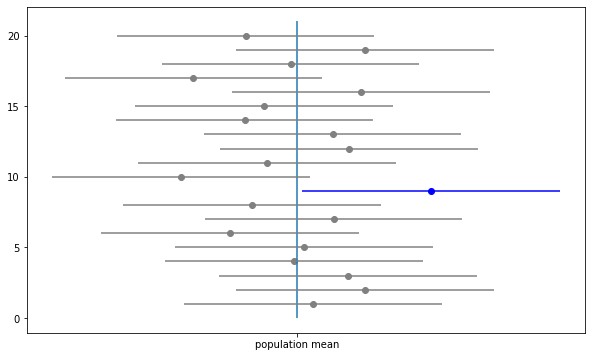

In [20]:
# 신뢰구간의 계산을 20번 계산하고 그중에 몇 번 모평균을 포함하고 있는지 확인
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv = stats.norm()
n_samples = 20
ax.vlines(p_mean, 0, 21)
for i in range(n_samples):
    sample_ = samples[i]
    s_mean_ = np.mean(sample_)
    lcl = s_mean_ - rv.isf(0.025) * np.sqrt(p_var/n)
    ucl = s_mean_ - rv.isf(0.975) * np.sqrt(p_var/n)
    if lcl <= p_mean <= ucl:
        ax.scatter(s_mean_, n_samples-i, color='gray')
        ax.hlines(n_samples-i, lcl, ucl, color='gray')
    else:
        ax.scatter(s_mean_, n_samples-i, color='b')
        ax.hlines(n_samples-i, lcl, ucl, color='b')
ax.set_xticks([p_mean])
ax.set_xticklabels(['population mean'])

plt.show()

In [21]:
# 신뢰구간을 1만 번 계산하고 신뢰구간에 모평균이 포함된 것은 몇 %인지 확인
rv = stats.norm()
cnt = 0

for sample_ in samples:
    s_mean_ = np.mean(sample_)
    lcl = s_mean_ - rv.isf(0.025) * np.sqrt(p_var/n)
    ucl = s_mean_ - rv.isf(0.975) * np.sqrt(p_var/n)
    if lcl <= p_mean <= ucl:
        cnt +=1
cnt / len(samples) # 신뢰구간의 약 95%가 모평균을 포함하고 있음을 확인

0.951

In [22]:
# 준비해둔 1만 개의 표본 데이터에서 Y의 표본 데이터를 생성
sample_y = sample_u_vars * (n-1) / p_var
sample_y

array([11.303, 15.767, 18.102, ..., 19.435,  9.265, 18.625])

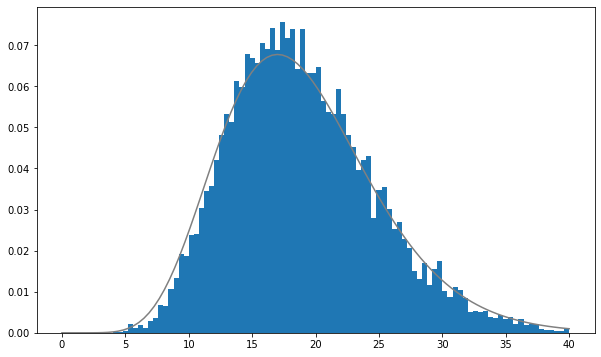

In [23]:
# Y의 표본 데이터 히스토그램과 카이제곱분포의 밀도함수 나타내기
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 40, 100)
rv = stats.chi2(df=n-1)
ax.plot(xs, rv.pdf(xs), color='gray')
hist, _, _ = ax.hist(sample_y, bins=100, range=(0,40), density=True)

plt.show() # 대략 일치하는 것을 확인

In [24]:
# 학생데이터 활용하여 모분산의 신뢰구간 구현
rv = stats.chi2(df=n-1)
lcl = (n-1) * u_var / rv.isf(0.025)
ucl = (n-1) * u_var / rv.isf(0.975)

lcl, ucl

(91.52471947132238, 337.5955129124592)

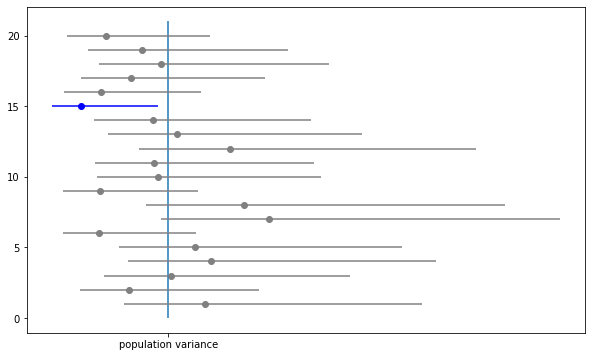

In [26]:
# 신뢰구간의 추정을 20번 수행하고 어느 정도 모분산을 포함하고 있는지 확인
# 카이제곱분포가 왼쪽으로 치우치고 오른쪽으로 넓어지는 분포이므로 
# 불편분산에 대해 오른쪽의 폭이 길어지고 불편분산이 클수록 구간추정의 폭이 길어지고 있다는 것을 알 수 있음
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv = stats.chi2(df=n-1)
n_samples = 20
ax.vlines(p_var, 0, 21)
for i in range(n_samples):
    sample_ = samples[i]
    u_var_ = np.var(sample_, ddof=1)
    lcl = (n-1) * u_var_ / rv.isf(0.025)
    ucl = (n-1) * u_var_ / rv.isf(0.975)
    if lcl <= p_var <= ucl:
        ax.scatter(u_var_, n_samples-i, color='gray')
        ax.hlines(n_samples-i, lcl, ucl, color='gray')
    else:
        ax.scatter(u_var_, n_samples-i, color='b')
        ax.hlines(n_samples-i, lcl, ucl, color='b')
ax.set_xticks([p_var])
ax.set_xticklabels(['population variance'])

plt.show()

In [27]:
# 신뢰구간을 1만 번 계산하고 신뢰구간에 모분산이 포함된 것은 몇 %인지 확인
rv = stats.chi2(df=n-1)
cnt = 0
for sample_ in samples:
    u_var_ = np.var(sample_, ddof=1)
    lcl = (n-1) * u_var_ / rv.isf(0.025)
    ucl = (n-1) * u_var_ / rv.isf(0.975)
    if lcl <= p_var <= ucl:
        cnt += 1
        
cnt / len(samples) # 약 96%가 모분산을 포함하고 있음

0.964

In [28]:
# 모분산을 알지 못할 때 모평균의 신뢰구간 구현
rv = stats.t(df=n-1)
lcl = s_mean - rv.isf(0.025) * np.sqrt(u_var/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(u_var/n)

lcl, ucl # 구간내에 모평균이 포함되어 있다는 것을 확인

(64.51244886603887, 76.28755113396114)

In [29]:
# 베르누이 분포 구현을 위한 데이터 불러오기
# '어느 기업이 출시한 상품 A를 알고 있는가'라는 길거리 설문조사를 전국적으로 수행하여 1000명에게 응답을 받은 것
# 1: 알고 있다, 0; 알지 못한다
enquete_df = pd.read_csv('ch10_enquete.csv')
enquete = np.array(enquete_df['known'])
n = len(enquete)
enquete[:10]

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [30]:
# 우선 점추정 수행
# 표본평균이 모평균의 좋은 추정량이 됨
s_mean = enquete.mean()
s_mean

0.709

In [31]:
# 베르누이 분포의 모평균의 신뢰구간
rv = stats.norm()
lcl = s_mean - rv.isf(0.025) * np.sqrt(s_mean*(1-s_mean)/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(s_mean*(1-s_mean)/n)

lcl,ucl # 상품 A에 대한 인지도 p의 95% 신뢰구간은 [0.681,0.737]이라는 것을 확인

(0.6808474522924337, 0.7371525477075662)

In [33]:
# 포아송 분포의 모평균 신뢰구간
# 어떤 사이트에 대한 1시간당 액세스 수가 과거 72시간 분량이 들어 있는 데이터 불러오기
n_access_df = pd.read_csv('ch10_access.csv')
n_access = np.array(n_access_df['access number'])
n = len(n_access)
n_access[:10]

array([10, 11,  9,  9, 18, 13,  4, 10, 10,  8], dtype=int64)

In [34]:
# 모평균 람다를 추정
s_mean = n_access.mean()
s_mean

10.444444444444445

In [36]:
rv = stats.norm()
lcl = s_mean - rv.isf(0.025) * np.sqrt(s_mean/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(s_mean/n)

lcl,ucl # 사이트에 대한 평균 액세스 수의 95% 신뢰구간은 [9.698,11.191]임을 확인

(9.697953549598202, 11.190935339290688)